# IMPORT

In [2]:
import os
import pandas as pd

# LOAD DATA

In [3]:
save_dir = r"C:\APAC\all_projects\finetuning-airflow-project\project_2_training\data"
train_path = os.path.join(save_dir, "train.csv")
val_path = os.path.join(save_dir, "val.csv")
test_path = os.path.join(save_dir, "test.csv")

In [4]:
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

In [9]:
train_df.columns

Index(['Unnamed: 0', 'title', 'label'], dtype='object')

In [10]:
X_train, y_train = train_df["title"], train_df["label"]
X_test, y_test = test_df["title"], test_df["label"]

# EDA

In [11]:
def visualize_label_distribution(y, name="Label Distribution"):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Map numerical labels back to names for visualization
    id2label = {0: "negative", 1: "positive", 2: "neutral"}
    
    # Count the occurrences of each label
    label_counts = y.value_counts().sort_index()
    label_names = [id2label[i] for i in label_counts.index]
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot
    axes[0].bar(label_names, label_counts.values, color=['#d32f2f', '#388e3c', '#1976d2'])
    axes[0].set_xlabel('Sentiment', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_title(f'{name} (Bar Chart)', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (label, count) in enumerate(zip(label_names, label_counts.values)):
        axes[0].text(i, count + max(label_counts.values) * 0.01, str(count), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Pie chart
    colors = ['#d32f2f', '#388e3c', '#1976d2']
    axes[1].pie(label_counts.values, labels=label_names, autopct='%1.1f%%', 
                colors=colors, startangle=90, textprops={'fontsize': 11})
    axes[1].set_title(f'{name} (Pie Chart)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

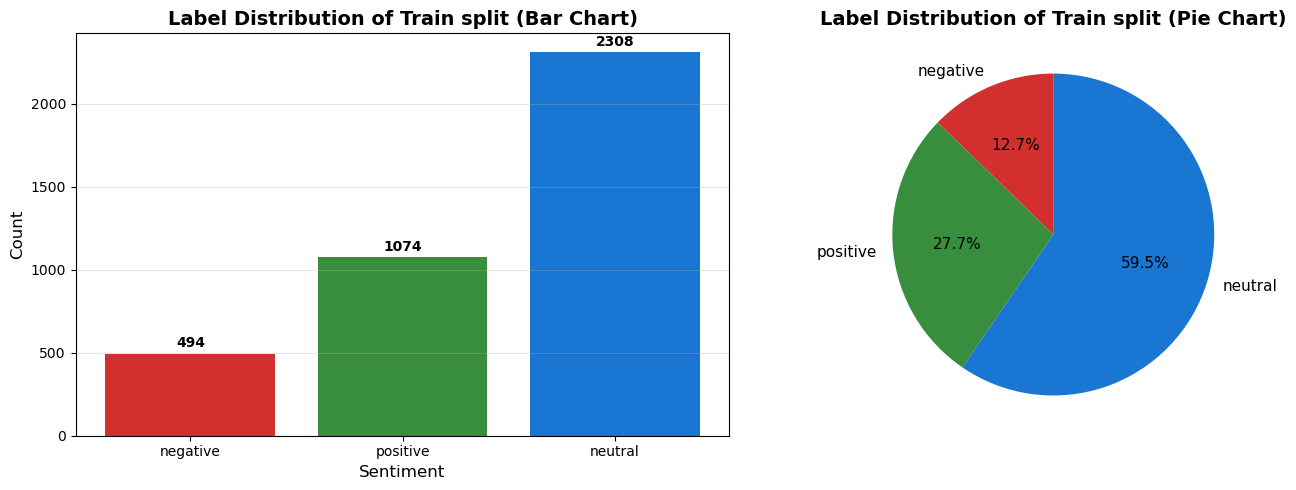

In [12]:
visualize_label_distribution(y_train, "Label Distribution of Train split")

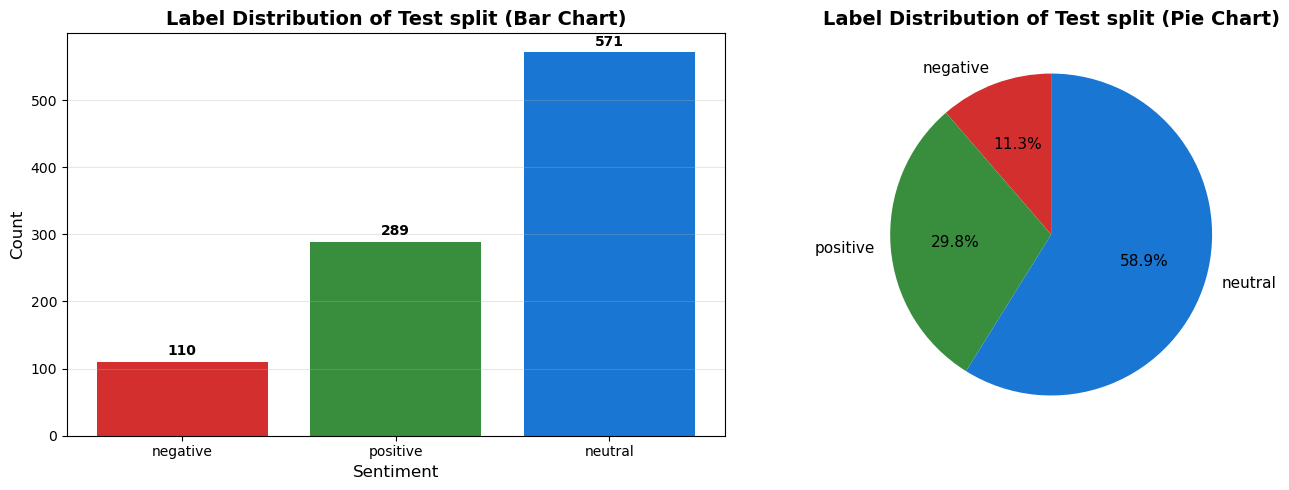

In [14]:
visualize_label_distribution(y_test, "Label Distribution of Test split")